In [77]:
remotes::install_github("kjhealy/covdata")


Skipping install of 'covdata' from a github remote, the SHA1 (4a979811) has not changed since last install.
  Use `force = TRUE` to force installation



In [78]:
library(covdata)
library(tidyverse)

In [79]:
covnat

cname,date,iso3,cases,deaths,pop_2018,cu_cases,cu_deaths,first_day,days
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<int>
Afghanistan,2020-02-25,AFG,1,0,37172386,1,0,2020-02-25,0
Afghanistan,2020-02-26,AFG,0,0,37172386,1,0,2020-02-25,1
Afghanistan,2020-02-27,AFG,0,0,37172386,1,0,2020-02-25,2
Afghanistan,2020-02-28,AFG,0,0,37172386,1,0,2020-02-25,3
Afghanistan,2020-02-29,AFG,0,0,37172386,1,0,2020-02-25,4
Afghanistan,2020-03-01,AFG,0,0,37172386,1,0,2020-02-25,5
Afghanistan,2020-03-02,AFG,0,0,37172386,1,0,2020-02-25,6
Afghanistan,2020-03-08,AFG,3,0,37172386,4,0,2020-02-25,12
Afghanistan,2020-03-11,AFG,3,0,37172386,7,0,2020-02-25,15


In [80]:
covnat = covnat %>% arrange (cname, date) %>% filter (cu_cases>0) 

In [81]:
#We get the first day for each country
min_day_per_country= aggregate.data.frame(covnat$date,
                by = list(covnat$cname),
                FUN = min)
#we rename the columns
colnames(min_day_per_country) <- c("cname","first_day")

In [82]:
covnat=merge(covnat, min_day_per_country, by='cname' )


In [98]:
covnat= covnat  %>%  mutate (days=as.integer( date-first_day))



ERROR: Error: object 'first_day' not found


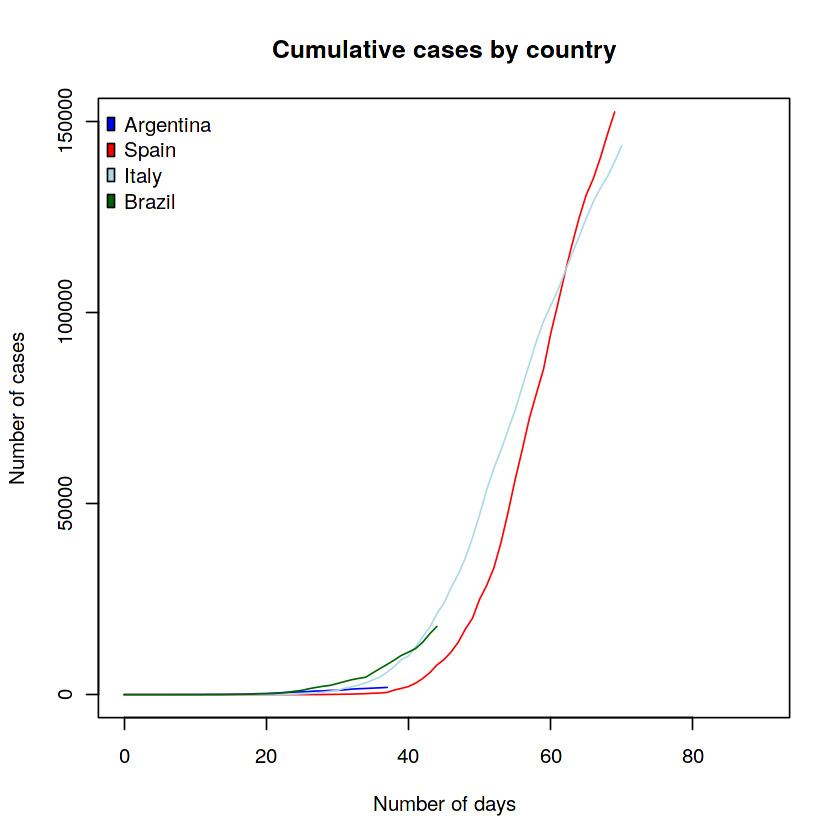

In [97]:
plot(covnat[covnat$cname=='Argentina',]$days, covnat[covnat$cname=='Argentina',]$cu_cases, type='l', col='blue', main='Cumulative cases by country', xlab='Number of days', ylab='Number of cases', xlim=c(0,90), ylim=c(0,150000) )

lines(covnat[covnat$cname=='Spain',]$days, covnat[covnat$cname=='Spain',]$cu_cases, col='red')

lines(covnat[covnat$cname=='Italy',]$days, covnat[covnat$cname=='Italy',]$cu_cases, col='lightblue')

lines(covnat[covnat$cname=='Brazil',]$days, covnat[covnat$cname=='Brazil',]$cu_cases, col='darkgreen')

legend("topleft", 
  legend = c('Argentina', 'Spain', 'Italy', 'Brazil'),
  fill =c('blue', 'red', 'lightblue', 'darkgreen'),
    col=c('blue', 'red', 'lightblue', 'darkgreen'),
        bty='n')

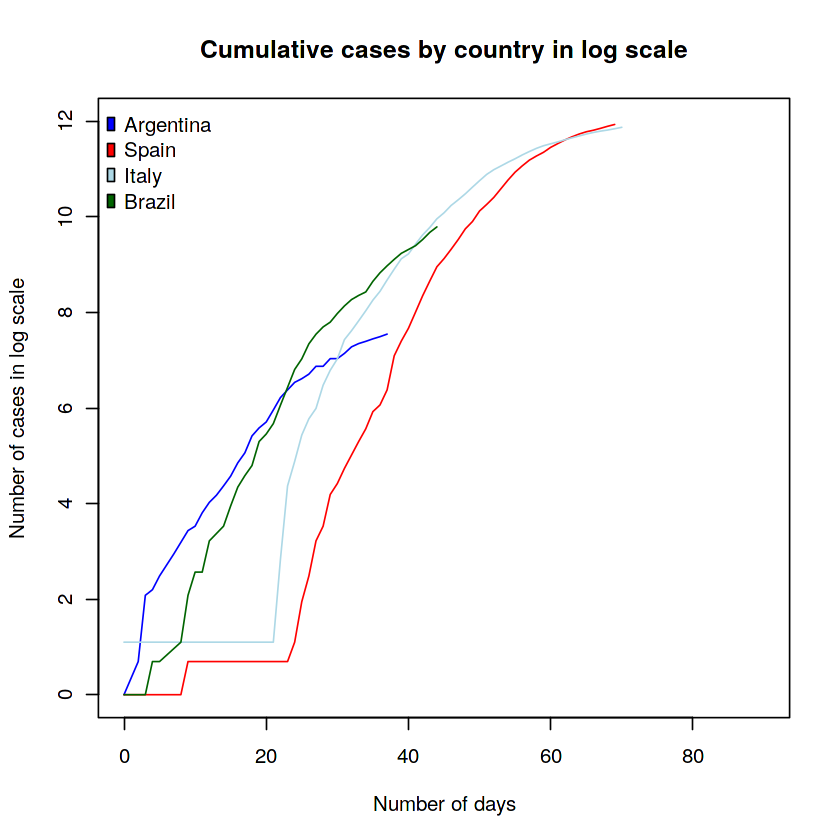

In [96]:
plot(covnat[covnat$cname=='Argentina',]$days, log(covnat[covnat$cname=='Argentina',]$cu_cases), type='l', col='blue', main='Cumulative cases by country in log scale', xlab='Number of days', ylab='Number of cases in log scale', xlim=c(0,90), ylim=c(0,12) )

lines(covnat[covnat$cname=='Spain',]$days, log(covnat[covnat$cname=='Spain',]$cu_cases), col='red')

lines(covnat[covnat$cname=='Italy',]$days, log(covnat[covnat$cname=='Italy',]$cu_cases), col='lightblue')

lines(covnat[covnat$cname=='Brazil',]$days, log(covnat[covnat$cname=='Brazil',]$cu_cases), col='darkgreen')

legend("topleft", 
  legend = c('Argentina', 'Spain', 'Italy', 'Brazil'),
  fill =c('blue', 'red', 'lightblue', 'darkgreen'),
    col=c('blue', 'red', 'lightblue', 'darkgreen'),
        bty='n')